In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

In [4]:
df=pd.read_csv("../dataset_mood_smartphone_clean.csv")

In [5]:
df.head()

,id,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,...,appCat.utilities,appCat.weather,call,screen,sms,activity,circumplex.arousal,circumplex.valence,mood,target
0,AS14.01,9559.682,28042.367,5653.099,3062.187,333.305,28.098,343.697,6396.461,458.411,...,928.988,0.000,8.0,55840.403998,5.0,0.087991,-0.291667,0.952381,7.680000,8.000000
1,AS14.02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,106.887,0.000,...,0.000,0.000,39.0,13.080000,6.0,0.081835,-0.666667,-0.166667,5.666667,9.000000
2,AS14.03,1598.930,4145.468,12209.611,56.467,0.000,14.902,1055.128,0.000,252.664,...,46.399,0.000,23.0,22151.371000,2.0,0.105415,-0.947368,1.052632,7.500000,7.666667
3,AS14.05,4203.526,20346.719,1018.870,0.000,0.000,0.000,816.424,2523.125,0.000,...,87.530,0.000,3.0,29245.021996,12.0,0.044154,-0.130435,1.000000,6.913043,6.333333
4,AS14.06,2021.525,14004.311,4517.613,0.000,0.000,419.788,866.989,9215.704,125.455,...,0.000,8.026,3.0,28065.064999,3.0,0.140943,-0.687500,0.400000,6.937500,7.000000


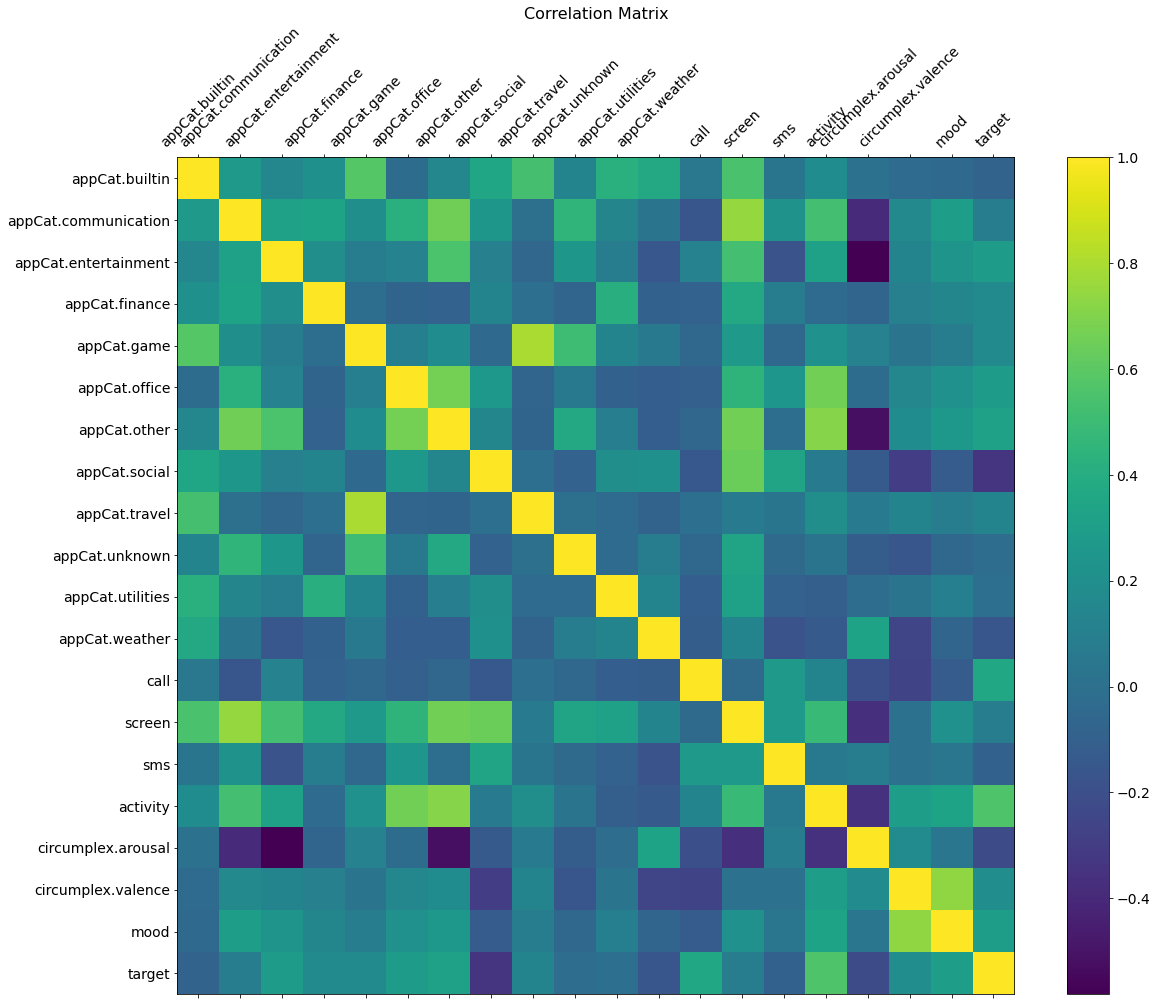

In [9]:
corr_df = df
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(range(corr_df.select_dtypes(['number']).shape[1]), corr_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(corr_df.select_dtypes(['number']).shape[1]), corr_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

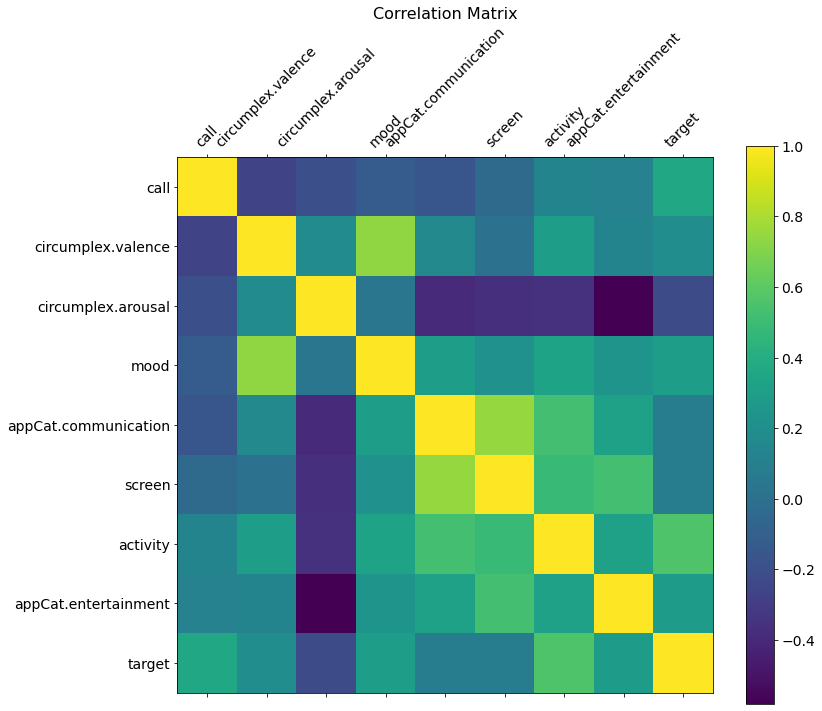

In [56]:
corr_df = df[["call","circumplex.valence","circumplex.arousal","mood","appCat.communication","screen","activity","appCat.entertainment","target"]]
f = plt.figure(figsize=(12, 10))
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(range(corr_df.select_dtypes(['number']).shape[1]), corr_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(corr_df.select_dtypes(['number']).shape[1]), corr_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
# Multi-variate Random Forrest

In [20]:
target = df['target']

In [16]:
features= df.drop(['target','id'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [24]:
# Split the data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.25, random_state = 42)

In [25]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_target.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', train_target.shape)


Training Features Shape: (20, 19)
Training Labels Shape: (20,)
Testing Features Shape: (7, 19)
Testing Labels Shape: (20,)


In [34]:
# The baseline predictions are the historical averages
baseline_preds = np.array(df['mood'])
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - target)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  0.5


In [37]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(train_features, train_target);

In [44]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_target)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


Mean Absolute Error: 0.49


In [41]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_target)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 93.71 %.


In [43]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (baseline_errors / target)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 93.08 %.


In [47]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = feature_list,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [48]:
feature_importances

,importance
call,0.253532
circumplex.valence,0.134114
circumplex.arousal,0.103116
mood,0.089346
appCat.communication,0.065924
screen,0.048753
activity,0.048048
appCat.entertainment,0.041399
appCat.other,0.033268
appCat.office,0.032438


In [ ]:
# Random Forrest with less features

In [50]:
features= df[['call','circumplex.valence','circumplex.arousal','mood']] #df.drop(['target','id'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.25, random_state = 42)

rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf2.fit(train_features, train_target);

# Use the forest's predict method on the test data
predictions2 = rf2.predict(test_features)
# Calculate the absolute errors
errors2 = abs(predictions2 - test_target)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors2), 2))


Mean Absolute Error: 0.43


In [53]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors2 / test_target)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.42 %.


In [54]:
rf2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [57]:
param_grid = { 
    'n_estimators': [200, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    "bootstrap" : [True, False]
}

In [61]:
rfr = RandomForestRegressor(random_state = 42)
CV_rf = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rf.fit(train_features, train_target)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 1000]})

In [62]:
CV_rf.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [73]:
features= df[['call','circumplex.valence','circumplex.arousal','mood','screen','appCat.entertainment','sms']] #df.drop(['target','id'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.25, random_state = 42)

rf2 = RandomForestRegressor(n_estimators = 200, random_state = 42,bootstrap= True,max_depth= 4,max_features='auto')

rf2.fit(train_features, train_target);

# Use the forest's predict method on the test data
predictions2 = rf2.predict(test_features)
# Calculate the absolute errors
errors2 = abs(predictions2 - test_target)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors2), 2))


Mean Absolute Error: 0.41


In [80]:
mse = mean_squared_error(test_target,predictions2)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

0.3323319548571616
0.5764823976993241


In [ ]:
# uni-variate Random Forrest

In [52]:
features= df[['mood']] #df.drop(['target','id'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.25, random_state = 42)

rf3 = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf3.fit(train_features, train_target);

# Use the forest's predict method on the test data
predictions3 = rf3.predict(test_features)
# Calculate the absolute errors
errors3 = abs(predictions3 - test_target)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors3), 2))


Mean Absolute Error: 0.45


In [ ]:
# uni-variate SVM